# Praktikum  1

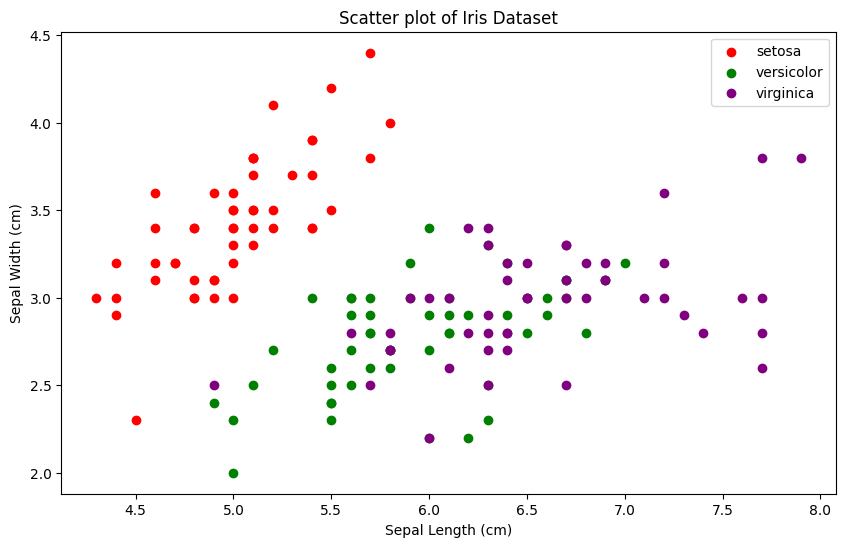

In [ ]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Define target names
target_names = iris.target_names



# Create a color map for each species
colors = ['red', 'green', 'purple']

# Visualize the dataset
plt.figure(figsize=(10, 6))

# Loop through each species and plot them separately
for i in range(len(target_names)):
    subset = df[df['target'] == i]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                color=colors[i], label=target_names[i])

plt.title('Scatter plot of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


# Praktikum 2

In [ ]:
# Import numpy
import numpy as np

# Create arrays for matrix multiplication
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.array([[1.1, 2.6], [3.5, 4.4]])
d = np.array([[5.0, 6.1], [7.2, 8.2]])

# Perform matrix multiplication
result = np.dot(c,d)
print("Dot product of matrices:\n", result)

# Floating point precision issue demonstration
small_number = 1e-10
print("Small number: ", small_number)
print("Small number + 1: ", small_number + 1)  # Loss of precision example

Dot product of matrices:
 [[24.22 28.03]
 [49.18 57.43]]
Small number:  1e-10
Small number + 1:  1.0000000001


# Praktikum 3

## Bangun model k-NN dengan dataset iris

In [1]:
# Import libraries yang diperlukan
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # Mengambil 2 fitur pertama untuk memudahkan visualisasi
y = iris.target

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Visualisasi Batas Keputusan

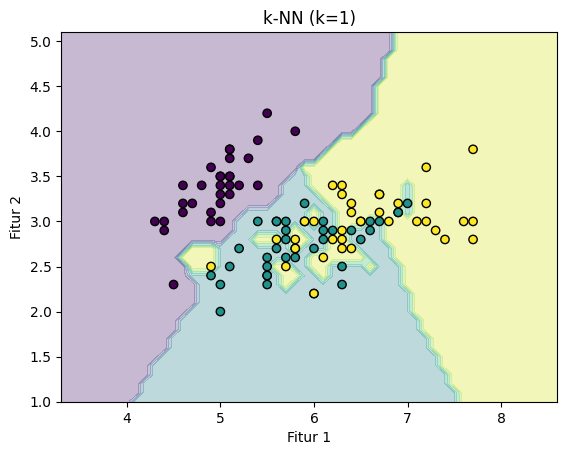

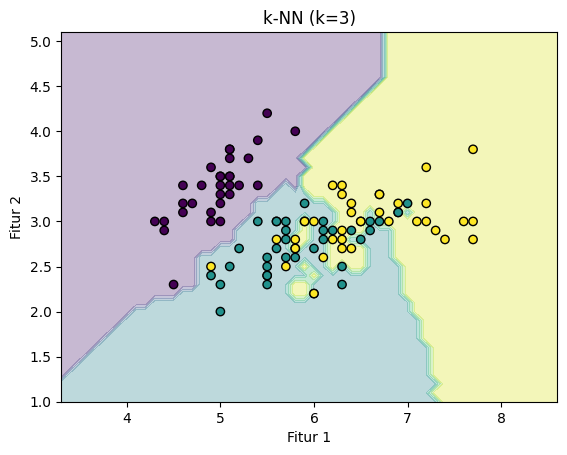

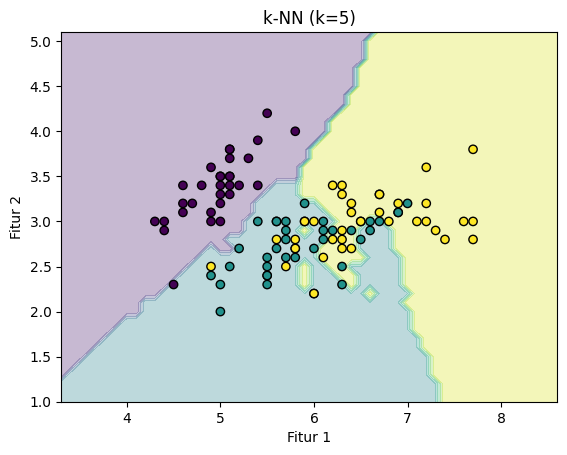

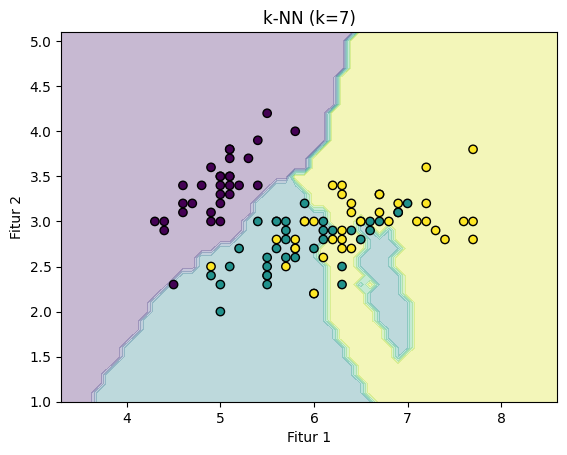

In [2]:
# Fungsi untuk memvisualisasikan batas keputusan
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.show()

# Visualisasi untuk berbagai nilai k
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, knn, f"k-NN (k={k})")


## Modifikasi Model dengan Preprocessing (Normalisasi dan Standarisasi)

### a. Normalisasi Data

In [3]:
# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Bangun model k-NN setelah normalisasi
knn_norm = KNeighborsClassifier(n_neighbors=3)
knn_norm.fit(X_train_norm, y_train)

# Evaluasi model
y_pred_norm = knn_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f"Akurasi model k-NN dengan normalisasi: {accuracy_norm:.2f}")


Akurasi model k-NN dengan normalisasi: 0.76


### b. Stanadarisasi Data

In [4]:
# Standarisasi dengan StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Bangun model k-NN setelah standarisasi
knn_std = KNeighborsClassifier(n_neighbors=3)
knn_std.fit(X_train_std, y_train)

# Evaluasi model
y_pred_std = knn_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)
print(f"Akurasi model k-NN dengan standarisasi: {accuracy_std:.2f}")


Akurasi model k-NN dengan standarisasi: 0.80
